## Some Questions that I answered through this data
1) Which game category has the highest no of downlaods?

2) Which game category holds game with highest no of ratings?

3) With respect to downlaods and average ratings which category holds the most number of popular games?


### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read Data

In [2]:
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [3]:
df = pd.read_csv('android-games.csv')

In [4]:
df.head(2)

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire - The Cobra,80678661,500.0 M,4.33,2.9,7.9,0.0,GAME ACTION,61935712,4478738,2795172,1814999,9654037,False
1,2,PUBG MOBILE: Graffiti Prank,35971961,100.0 M,4.24,2.0,3.1,0.0,GAME ACTION,26670566,2109631,1352610,893674,4945478,False


In [5]:
df.shape

(1730, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1730 non-null   float64
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   price             1730 non-null   float64
 8   category          1730 non-null   object 
 9   5 star ratings    1730 non-null   int64  
 10  4 star ratings    1730 non-null   int64  
 11  3 star ratings    1730 non-null   int64  
 12  2 star ratings    1730 non-null   int64  
 13  1 star ratings    1730 non-null   int64  
 14  paid              1730 non-null   bool   
dtypes: bool(1), float64(4), int64(7), object(3)
memory usage: 191.0+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rank,1730.0,5.047572e+01,2.894163e+01,1.00,25.00,51.00,75.75,100.00
total ratings,1730.0,1.101182e+06,3.311738e+06,38238.00,187998.75,457675.00,944334.25,80678661.00
average rating,1730.0,4.313410e+00,2.535452e-01,3.09,4.18,4.33,4.49,4.91
growth (30 days),1730.0,1.931673e+02,4.775618e+03,0.00,0.10,0.50,1.60,140394.40
growth (60 days),1730.0,3.969249e+00,1.891290e+01,0.00,0.30,1.00,3.30,605.10
price,1730.0,1.296532e-02,2.434924e-01,0.00,0.00,0.00,0.00,7.49
5 star ratings,1730.0,7.883837e+05,2.483061e+06,21898.00,135829.00,310943.50,651131.00,61935712.00
4 star ratings,1730.0,1.216466e+05,2.955701e+05,2441.00,21802.00,54643.50,109564.75,5397273.00
3 star ratings,1730.0,5.954986e+04,1.447400e+05,707.00,10277.75,26658.50,55817.50,2795172.00
2 star ratings,1730.0,2.796247e+04,7.676625e+04,288.00,4529.50,11330.50,25266.50,1814999.00


In [8]:
df.isnull().sum()

rank                0
title               0
total ratings       0
installs            0
average rating      0
growth (30 days)    0
growth (60 days)    0
price               0
category            0
5 star ratings      0
4 star ratings      0
3 star ratings      0
2 star ratings      0
1 star ratings      0
paid                0
dtype: int64

In [9]:
# numerical columns
numerical_columns = df.dtypes[df.dtypes != 'object']

In [10]:
#categorical_columns
categorical_columns = df.dtypes[df.dtypes == 'object']

In [11]:
#df['rank'].value_counts().plot(kind = 'hist')

## EDA

In [12]:
df[df['price'] != 0]

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
91,92,Hitman Sniper,848831,10.0 M,4.41,0.3,0.8,0.99,GAME ACTION,607502,115334,48040,19224,58729,True
153,54,Terraria,317546,1.0 M,4.65,1.0,2.3,4.99,GAME ADVENTURE,264563,24837,10184,4387,13572,True
211,12,Minecraft,3999232,10.0 M,4.54,1.4,2.8,7.49,GAME ARCADE,3214765,312995,138682,70661,262126,True
261,62,Geometry Dash,767518,1.0 M,4.62,0.6,1.2,1.99,GAME ARCADE,623950,73997,25169,9705,34694,True
477,64,Reigns,146504,500.0 k,4.58,0.1,0.2,2.99,GAME CARD,108627,25330,5696,2743,4105,True
869,46,Cytus II,109687,1.0 M,4.59,1.0,2.2,1.99,GAME MUSIC,86420,12246,4534,1999,4484,True
1588,65,Trivia Crack (No Ads),74594,500.0 k,4.58,0.9,2.2,1.99,GAME TRIVIA,55411,12625,3123,1117,2315,True


#### Majority of the games are free

In [13]:
df['category'].value_counts()

GAME CARD            122
GAME WORD            106
GAME CASUAL          102
GAME ROLE PLAYING    100
GAME ACTION          100
GAME TRIVIA          100
GAME BOARD           100
GAME SIMULATION      100
GAME ADVENTURE       100
GAME STRATEGY        100
GAME EDUCATIONAL     100
GAME PUZZLE          100
GAME ARCADE          100
GAME SPORTS          100
GAME RACING          100
GAME MUSIC           100
GAME CASINO          100
Name: category, dtype: int64

#### All of the classes are balanced

In [14]:
#### Paid column and price column are highly inter correlatedso we will drop the paid column later maybe
#### Also title column is useless as we are not doing nlp in this notebook

In [15]:
df['installs'].value_counts()

10.0 M      795
50.0 M      266
5.0 M       248
100.0 M     203
1.0 M       191
500.0 k      13
500.0 M      10
1000.0 M      2
100.0 k       2
Name: installs, dtype: int64

In [16]:
installs_range = {
    '100.0 k' : 100000,
    '500.0 k' : 500000,
    '1.0 M' : 1000000,
    '5.0 M' : 5000000,
    '10.0 M' :10000000,
    '50.0 M' : 50000000,
    '100.0 M': 100000000,
    '500.0 M': 500000000,
    '1000.0 M': 1000000000,
}

In [17]:
df['installs_num'] = df['installs'].map(installs_range)

In [18]:
df.head(2)

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid,installs_num
0,1,Garena Free Fire - The Cobra,80678661,500.0 M,4.33,2.9,7.9,0.0,GAME ACTION,61935712,4478738,2795172,1814999,9654037,False,500000000
1,2,PUBG MOBILE: Graffiti Prank,35971961,100.0 M,4.24,2.0,3.1,0.0,GAME ACTION,26670566,2109631,1352610,893674,4945478,False,100000000


In [19]:
temp_df = df.groupby(by = 'category')['installs_num'].sum()

In [20]:
temp_df = temp_df.reset_index()

In [21]:
temp_df = temp_df.sort_values(by = 'installs_num')

In [22]:
temp_df.head(2)

,category,installs_num
15,GAME TRIVIA,704100000
5,GAME CASINO,788500000


<AxesSubplot:xlabel='installs_num', ylabel='category'>

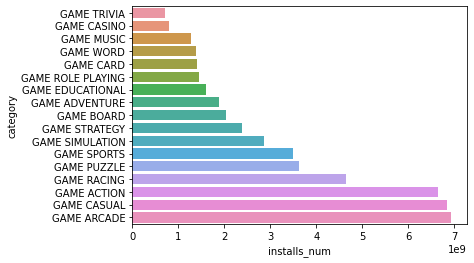

In [23]:
sns.barplot(y= 'category',x = 'installs_num',data = temp_df)

##### Observation:
Arcade, Casual and Action games are high on downlads with Racing a little behind(pun intended).

Trivia, Casino are the worst perfoming games in term of downloads

In [24]:
temp_df = df.groupby(by = 'category')['total ratings'].sum().reset_index().sort_values(by = 'total ratings')

In [25]:
temp_df.head(2)

,category,total ratings
7,GAME EDUCATIONAL,14243583
8,GAME MUSIC,22451222


<AxesSubplot:xlabel='total ratings', ylabel='category'>

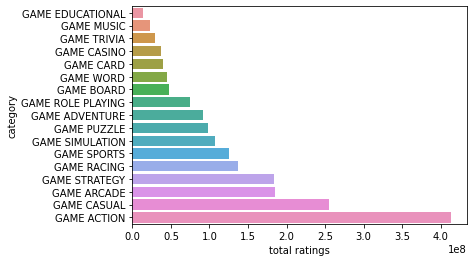

In [26]:
sns.barplot(y= 'category',x = 'total ratings',data = temp_df)

#### Observations:
Action has highest no. of ratings with casual category second and arcade & racing finishing last in top 3 but in terms of downloads they were all equal

It implies action usually gets more 5 star and arcade & racing gets usually lower star rating(more 3s and 4s)

Also Educational has the worst rating while its downlaod were way higher than Trivia, Music and Casino

In [27]:
temp_df = df.sort_values(by = ['installs_num','average rating'], ascending = False).head(200)

In [28]:
temp_df =temp_df.groupby(by = 'category')['installs_num'].count().reset_index().sort_values(by = 'installs_num', ascending = False)

<AxesSubplot:xlabel='installs_num', ylabel='category'>

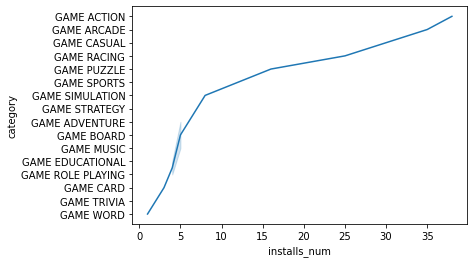

In [30]:
sns.lineplot(x= 'installs_num', y = 'category' ,data = temp_df)

#### Highest rating game wrt to installs still belong to category action and arcade with casual just behingd
#### Word, trivia games are the worst in terms of ratings and downloads both

# Work in progress
Do upvote if you like it